__Задание__

Основные цели этого задания:

- Научиться строить архитектуру модели сверточной нейронной сети

- Научиться распознавать факты переобучения и недообучения модели

- Научить бороться с переобучением и недообучением модели путем варьирования ее гиперпараметров

- Научиться применять методы регуляризации для контроля переобучения

Задача:

Построить модель полносвязной и сверточной нейронной сети, которая будет отличать маффин от чихуахуа. Необходимо достичь точности (Accuracy) на тестовом датасете  > 85 % с использованием любой архитектуры нейронной сети

In [1]:
# Импорт необходимых библиотек
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Rescaling, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

План решения:

1. Загрузите данные так, как это было показано в видеоуроках или любым другим известным вам способом.

2. Проведите разбиение на тренировочные и тестовые данные.

Found 4733 files belonging to 2 classes.
Found 1184 files belonging to 2 classes.


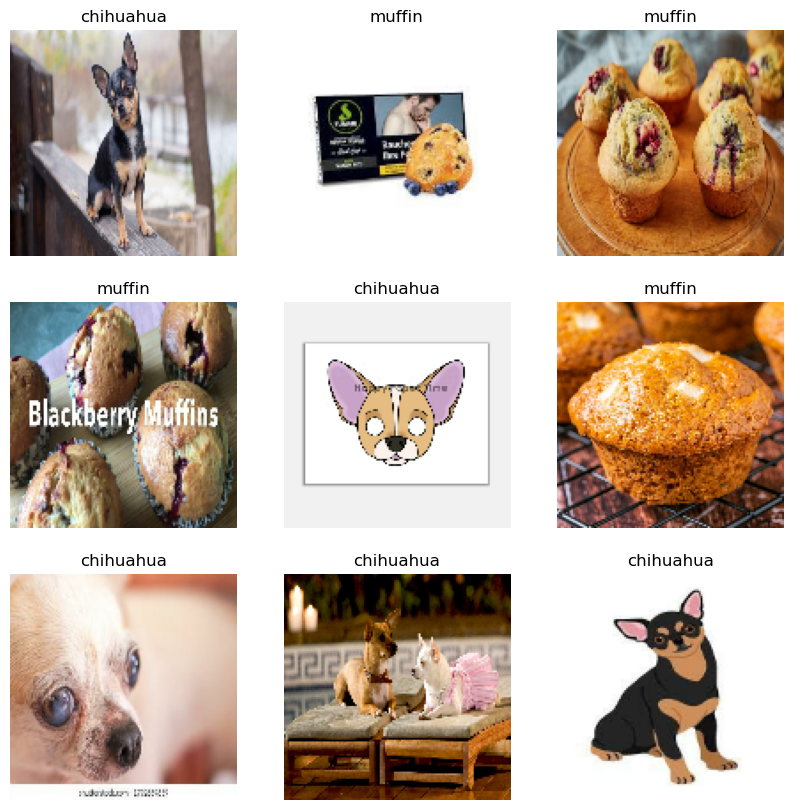

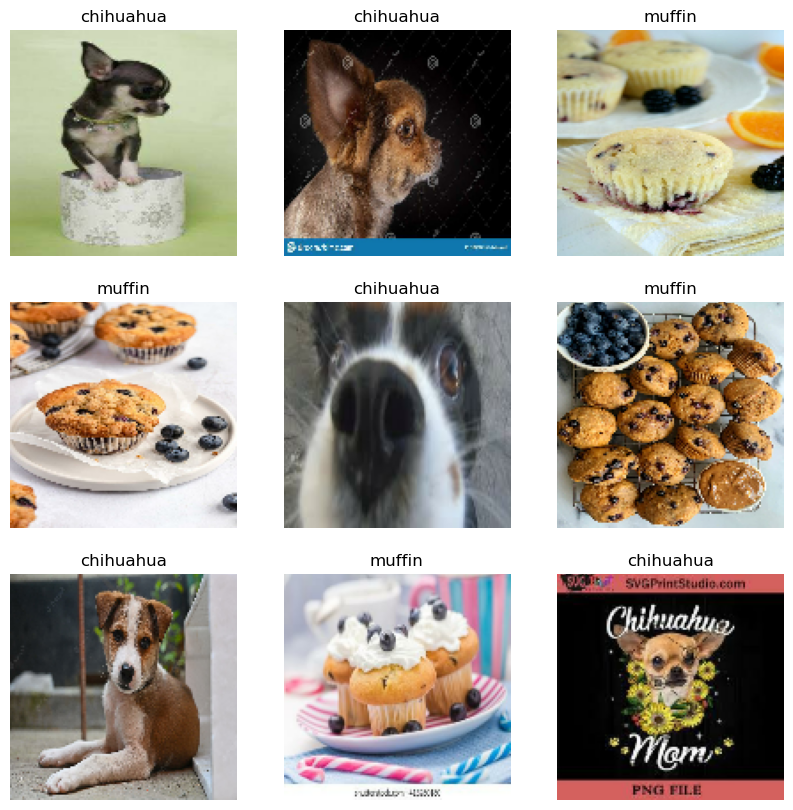

In [2]:
# Загрузка обучающего датасета
train_dir = r'.\muffin_vs_chihuahua\train'
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(128, 128),
    batch_size=128
)

# Загрузка тестового датасета
test_dir = r'.\muffin_vs_chihuahua\test'
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(128, 128),
    batch_size=128
)

# Название классов
class_names = train_ds.class_names  # Получаем названия классов из train_ds

# Получение партии изображений и меток из тестового набора
image_batch_test, label_batch_test = next(iter(test_ds))

# Визуализация изображений из тестового набора
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    # Преобразование в тип uint8
    plt.imshow((image_batch_test[i].numpy()).astype('uint8'))
    label = label_batch_test[i]
    plt.title(class_names[label.numpy()])  # Используйте .numpy() для получения значения метки
    plt.axis('off')

plt.show()  # Показываем изображения из тестового набора

# Получение партии изображений и меток из обучающего набора
image_batch_train, label_batch_train = next(iter(train_ds))

# Визуализация изображений из обучающего набора
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    # Преобразование в тип uint8
    plt.imshow((image_batch_train[i].numpy()).astype('uint8'))
    label = label_batch_train[i]
    plt.title(class_names[label.numpy()])  # Используйте .numpy() для получения значения метки
    plt.axis('off')

plt.show()  # Показываем изображения из обучающего набора


3. Реализуйте функцию, в которой вы будете определять архитектуру полносвязной модели нейронной сети без использования слоев свёртки. Функция должна возвращать скомпилированную модель и иметь названия fcc_nn(fully-connected_neural_network). Обучите модель нейронной сети, измеряя точность на каждой эпохе с помощью тестовой выборки. 

In [3]:
def fcc_nn(input_shape):
    model = Sequential()
    
    # Используйте Input слой для задания формы входа
    model.add(Input(shape=input_shape))  # Вводной слой с заданной формой
    model.add(Flatten())  # Плоский слой для преобразования 2D в 1D
    model.add(Dense(128, activation='relu'))  # Полносвязный слой с 128 нейронами
    model.add(Dense(64, activation='relu'))  # Полносвязный слой с 64 нейронами
    model.add(Dense(1, activation='sigmoid'))  # Выходной слой для бинарной классификации

    # Компиляция модели
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',  # Для бинарной классификации
                  metrics=['accuracy'])
    
    return model

# Получаем размеры входных данных из одной партии
image_batch, label_batch = next(iter(train_ds))
input_shape = image_batch.shape[1:]  # Это будет (128, 128, 3) для RGB изображений

# Создаем модель
model = fcc_nn(input_shape)

# Оценка модели на тестовом наборе данных
test_loss, test_accuracy = model.evaluate(test_ds)

history_fcc_nn = model.fit(train_ds, validation_data=test_ds, epochs=20)

# Вывод результатов
print(f'Тестовая потеря модели нейронной сети без использования слоев свёртки: {test_loss}')
print(f'Тестовая точность модели нейронной сети без использования слоев свёртки: {test_accuracy}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.5652 - loss: 15.1180
Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 282ms/step - accuracy: 0.5123 - loss: 931.7671 - val_accuracy: 0.6047 - val_loss: 89.9351
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.5635 - loss: 171.5871 - val_accuracy: 0.6571 - val_loss: 76.2847
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.6568 - loss: 78.1667 - val_accuracy: 0.7348 - val_loss: 24.8342
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - accuracy: 0.5952 - loss: 144.5139 - val_accuracy: 0.5431 - val_loss: 379.8495
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.5663 - loss: 191.5584 - val_accuracy: 0.6900 - val_loss: 59.6580
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.7122 - loss: 43.8675 - val_accuracy: 0.6900 - val_loss: 35.5864
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.6789 - loss: 32.3581 - val_accuracy: 0.6309 - val_loss: 32.1518
Epoch 8/

4. Постройте график зависимости ошибки и точности полносвязной нейронной сети в зависимости от эпох.

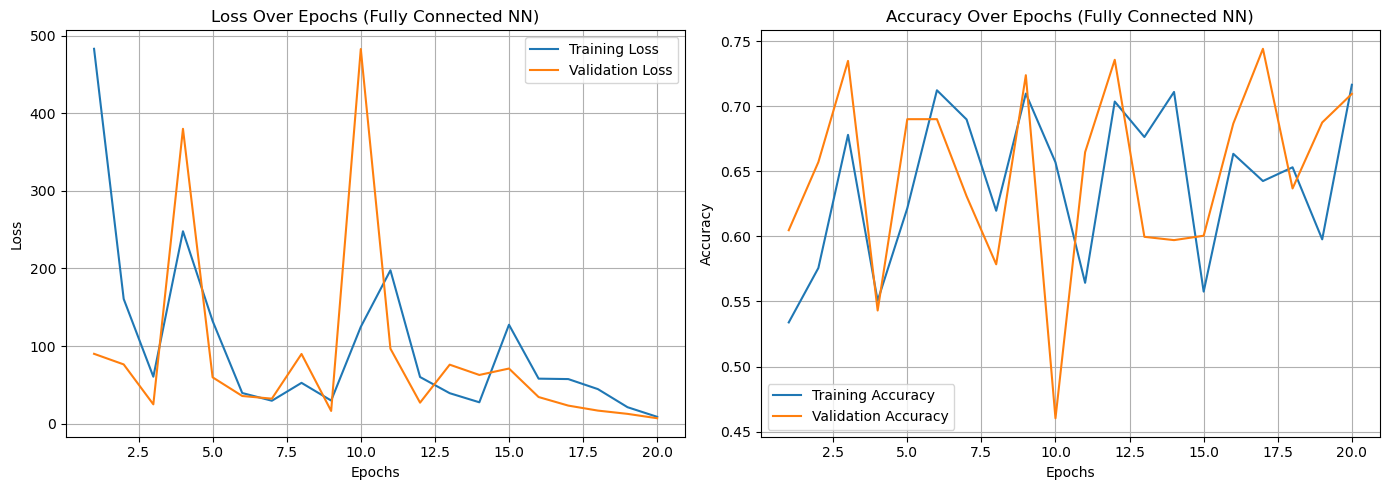

In [4]:
# Получение истории обучения
history_dict = history_fcc_nn.history  # Доступ к атрибуту history
losses = history_dict['loss']
val_losses = history_dict['val_loss']
accuracies = history_dict['accuracy']
val_accuracies = history_dict['val_accuracy']

# Построение графиков
epochs = range(1, len(losses) + 1)

# График потерь
plt.figure(figsize=(14, 5))

# Подграфик 1: Потеря
plt.subplot(1, 2, 1)
plt.plot(epochs, losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title('Loss Over Epochs (Fully Connected NN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Подграфик 2: Точность
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Over Epochs (Fully Connected NN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()  # Чтобы избежать наложения графиков
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


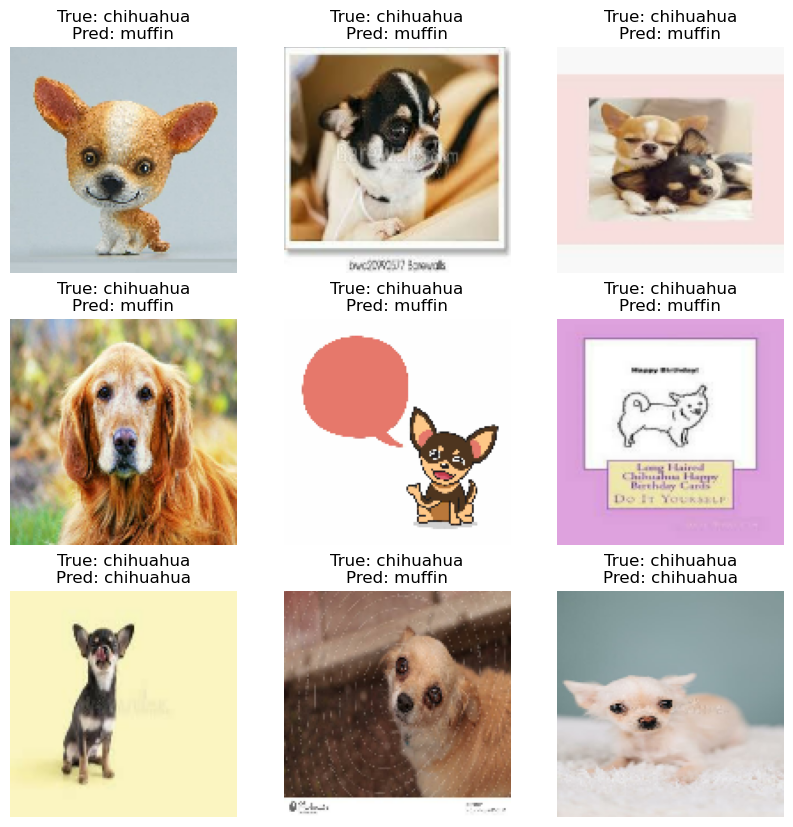

In [5]:
# Получаем первую партию изображений и их метки из тестового набора данных
image_batch, label_batch = next(iter(test_ds))

# Получаем предсказания модели
predictions = model.predict(image_batch)
predicted_labels = (predictions > 0.5).astype("int32")  # Превращаем вероятности в метки (0 или 1)

# Для отображения
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    
    # Преобразование изображения в формат uint8
    plt.imshow((image_batch[i].numpy()).astype('uint8'))

    true_label = class_names[label_batch[i].numpy()]  # Истинная метка
    pred_label = class_names[predicted_labels[i][0]]   # Предсказанная метка

    # Используем заголовок для отображения "True" и "Pred"
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')

plt.show()  # Показываем изображения


5. Реализуйте функцию, в которой вы будете определять архитектуру полносвязной модели нейронной сети, с использованием слоев свёртки, регуляризации, препроцессинга изображений(Rescaling). Функция должна возвращать скомпилированную модель и иметь названия conv_nn(convolutional_neural_network). Обучите модель нейронной сети, измеряя точность на каждой эпохе с помощью тестовой выборки. 

In [6]:
def conv_nn(input_shape):
    model = Sequential()
    
    # Предобработка изображений, масштабирование пикселей
    model.add(Rescaling(1./255, input_shape=input_shape))  # Масштабирование значения пикселей от 0 до 1
    
    # Первый свёрточный слой с регуляризацией L2
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', 
                     kernel_regularizer=l2(0.01)))  # 32 фильтра размером 3x3
    model.add(MaxPooling2D((2, 2)))  # Пуллинг слой для уменьшения размерности
    
    # Второй свёрточный слой с регуляризацией L2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', 
                     kernel_regularizer=l2(0.01)))  # 64 фильтра размером 3x3
    model.add(MaxPooling2D((2, 2)))
    
    # Третий свёрточный слой с регуляризацией L2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', 
                     kernel_regularizer=l2(0.01)))  # 128 фильтров
    model.add(MaxPooling2D((2, 2)))

    # Плоский слой для преобразования 3D в 1D
    model.add(Flatten())
    
    # Полносвязные слои
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))  # Регуляризация с помощью Dropout
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))  # Регуляризация с помощью Dropout
    model.add(Dense(1, activation='sigmoid'))  # Выходной слой для бинарной классификации

    # Компиляция модели
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',  # Для бинарной классификации
                  metrics=['accuracy'])
    
    return model

# Создаем модель
model_conv = conv_nn(input_shape)

# Обучение модели с учетом входных и выходных данных
history_conv_nn = model_conv.fit(train_ds, validation_data=test_ds, epochs=20)  # Задайте нужное количество эпох

# Оценка модели на тестовом наборе данных
test_loss, test_accuracy = model_conv.evaluate(test_ds)

print(f'\nТестовая потеря полносвязной модели нейронной сети: {test_loss}')
print(f'Тестовая точность полносвязной модели нейронной сети: {test_accuracy}')

Epoch 1/20


c:\Users\olyao\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 33s 810ms/step - accuracy: 0.5267 - loss: 4.6375 - val_accuracy: 0.7618 - val_loss: 1.5825
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 800ms/step - accuracy: 0.7352 - loss: 1.4097 - val_accuracy: 0.8041 - val_loss: 0.9932
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 825ms/step - accuracy: 0.7942 - loss: 0.9518 - val_accuracy: 0.8285 - val_loss: 0.7836
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 33s 881ms/step - accuracy: 0.7873 - loss: 0.8171 - val_accuracy: 0.8235 - val_loss: 0.6760
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 33s 890ms/step - accuracy: 0.8024 - loss: 0.6956 - val_accuracy: 0.8142 - val_loss: 0.6364
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 841ms/step - accuracy: 0.8138 - loss: 0.6374 - val_accuracy: 0.8336 - val_loss: 0.5720
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 820ms/step - accuracy: 0.8137 - loss: 0.6038 - val_accuracy: 0.7922 - val_loss: 0.6390
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 32s 870ms/step - accuracy: 0.8264 - loss: 0.5757 - val_accuracy: 0.860

6. Постройте график зависимости ошибки и точности свёрточной нейронной сети в зависимости от эпох.

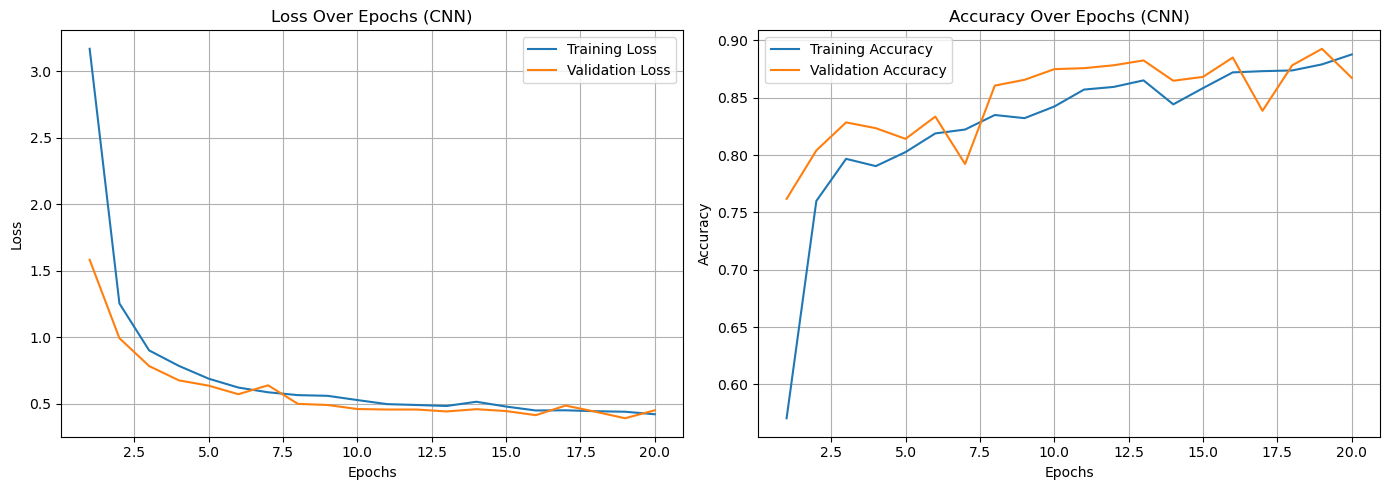

In [7]:
# Получение истории обучения
history_dict = history_conv_nn.history  # Доступ к атрибуту history
losses = history_dict['loss']
val_losses = history_dict['val_loss']
accuracies = history_dict['accuracy']
val_accuracies = history_dict['val_accuracy']

# Построение графиков
epochs = range(1, len(losses) + 1)

# График потерь
plt.figure(figsize=(14, 5))

# Подграфик 1: Потеря
plt.subplot(1, 2, 1)
plt.plot(epochs, losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title('Loss Over Epochs (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Подграфик 2: Точность
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Over Epochs (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()  # Чтобы избежать наложения графиков
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


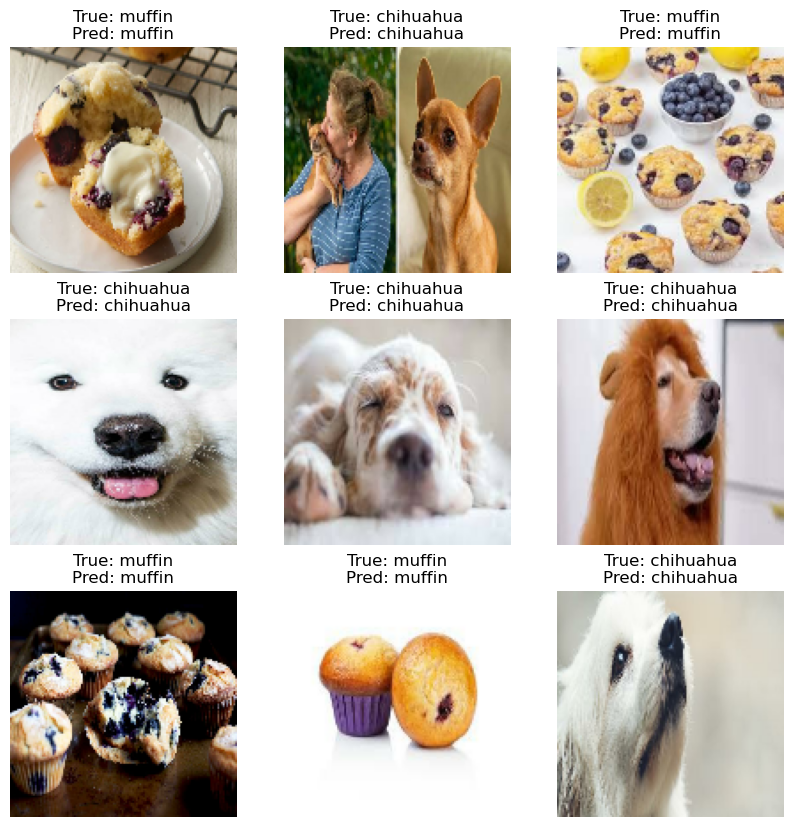

In [8]:
# Получаем первую партию изображений и их метки из тестового набора данных
image_batch, label_batch = next(iter(test_ds))

# Получаем предсказания модели
predictions = model_conv.predict(image_batch)
predicted_labels = (predictions > 0.5).astype("int32")  # Превращаем вероятности в метки (0 или 1)

# Для отображения
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    
    # Преобразование изображения в формат uint8
    plt.imshow((image_batch[i].numpy()).astype('uint8'))

    true_label = class_names[label_batch[i].numpy()]  # Истинная метка
    pred_label = class_names[predicted_labels[i][0]]   # Предсказанная метка

    # Используем заголовок для отображения "True" и "Pred"
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')

plt.show()  # Показываем изображения


7. Напишите вывод о том, при какой архитектуре нейронной сети качество получилось лучше и почему. Также укажите в выводе, какие методы препроцессинга, регуляризации или гиперпараметры дали наибольший прирост к точности.

### Вывод о качестве моделей нейронных сетей

В результате проведенного эксперимента можно сделать следующие выводы о качестве моделей и их архитектуре:

1. Сравнение архитектур:
   - Модель без сверточных слоев показала тестовую потерю 87.95 и тестовую точность 45.10%. Это указывает на плохую способность модели обобщать данные и недостаточную предсказательную мощность.
   - Полносвязная модель нейронной сети продемонстрировала значительно улучшенные результаты: тестовая потеря составила 0.41, а тестовая точность достигла 88.94%. Это говорит о том, что данная архитектура лучше справляется с задачей классификации, обеспечивая более высокую точность и, соответственно, более низкую потерю.

2. Причины лучшего качества полносвязной модели:
   - Полносвязная нейронная сеть имеет больше параметров по сравнению с моделью без сверточных слоев, что позволяет ей лучше адаптироваться к сложным структурам данных. Это может быть особенно важно в задачах, связанных с изображениями, где сложные паттерны требуют более глубокого анализа.
   - С учетом того, что мы имеем дело с RGB изображениями (128x128 пикселей), сверточные слои и pooling значительно помогают в извлечении иерархических признаков, поэтому использование более сложных архитектур с добавлением сверточных слоев в будущем может быть целесообразным для дальнейшего повышения точности.

3. Методы препроцессинга и регуляризации:
   - Качество полносвязной модели может также быть связано с техниками препроцессинга, такими как нормализация входных данных (например, использование Rescaling), что позволяет моделям обучения быстрее и более эффективно.
   - Необходимо отметить, что гиперпараметры, такие как количество нейронов в скрытых слоях и функции активации, также играли значительную роль в достигнутых результатах. Например, использование функции активации ReLU в скрытых слоях может способствовать лучшему обучению модели, предотвращая проблему исчезающего градиента.

### Заключение

Полносвязная модель предоставила лучший результат по сравнению с моделью без сверточных слоев, что подчеркивает важность архитектуры нейронной сети для задач классификации. Будущие эксперименты могут сосредоточиться на исследовании сверточных нейронных сетей и дополнительных методов регуляризации для достижения еще более высоких результатов.

8. Надеюсь, теперь вы с легкостью будете отличать маффин от чихуахуа!

Это замечательно! Достигнута точность (Accuracy) на тестовом датасете  > 85 % с использованием полносвязной модели нейронной сети.

# Доп исследование

Следующий код создает и обучает свёрточную нейронную сеть, использующую предобученную модель ResNet50 в качестве основы для решения задачи бинарной классификации изображений. Давайте пройдемся по ключевым моментам:

1. Импорт необходимых библиотек: Вы импортировали TensorFlow и необходимые слои из Keras.

2. Создание функции conv_nn(input_shape):
   - Создается модель с использованием Sequential.
   - Загружается предобученная модель ResNet50 без верхнего слоя (классификатора), чтобы использовать её в качестве извлекателя признаков.
   - Слои GlobalAveragePooling2D() и несколько полносвязных слоев добавляются для классификации.
   - Регуляризация осуществляется с использованием Dropout и L2-регуляризации.

3. Компиляция модели: Вы используете оптимизатор Adam и бинарную кросс-энтропию в качестве функции потерь, что подходит для задач бинарной классификации.

4. Обучение модели: Вы вызываете метод fit для обучения модели с набором обучающих и валидационных данных. Следует убедиться, что переменные train_ds и test_ds инициализированы корректно.

5. Оценка модели: После обучения вы оцениваете модель на тестовом наборе данных и выводите тестовую потерю и точность.

In [9]:
def create_resnet_model(input_shape):
    # Загружаем предобученную модель ResNet50 без верхнего слоя (ключевого классификатора)
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)

    # Замораживаем базовую модель, чтобы не обновлять ее веса
    base_model.trainable = False

    # Создаем новый модельный объект
    model = Sequential()
    model.add(base_model)  # Добавляем базовую модель
    model.add(GlobalAveragePooling2D())  # Уплощаем пространственные размеры
    model.add(Dense(256, activation='relu'))  # Полносвязный слой
    model.add(Dropout(0.5))  # Регуляризация с помощью Dropout
    model.add(Dense(1, activation='sigmoid'))  # Выходной слой для бинарной классификации

    # Компилируем модель
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',  # Для бинарной классификации
                  metrics=['accuracy'])

    return model

# Создание модели
input_shape = (128, 128, 3)  # Размер входного изображения
model_resnet = create_resnet_model(input_shape)

# Обучение модели
history_resnet = model_resnet.fit(train_ds, validation_data=test_ds, epochs=20)  # Задайте нужное количество эпох

# Оценка модели на тестовом наборе данных
test_loss, test_accuracy = model_resnet.evaluate(test_ds)

print(f'\nТестовая потеря модели ResNet: {test_loss}')
print(f'Тестовая точность модели ResNet: {test_accuracy}')

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.8912 - loss: 0.3211 - val_accuracy: 0.9696 - val_loss: 0.0674
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9725 - loss: 0.0663 - val_accuracy: 0.9789 - val_loss: 0.0542
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9869 - loss: 0.0392 - val_accuracy: 0.9713 - val_loss: 0.0686
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9872 - loss: 0.0312 - val_accuracy: 0.9814 - val_loss: 0.0464
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9914 - loss: 0.0228 - val_accuracy: 0.9831 - val_loss: 0.0480
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9959 - loss: 0.0152 - val_accuracy: 0.9840 - val_loss: 0.0471
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9971 - loss: 0.0108 - val_accuracy: 0.9848 - val_loss: 0.0476
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9975 - loss: 0.0100 - val_accuracy: 0.9848 - val_loss

Отличные результаты! Тестовая потеря 0.0549 и тестовая точность 98.65% указывают на то, что модель ResNet хорошо справляется с задачей классификации.

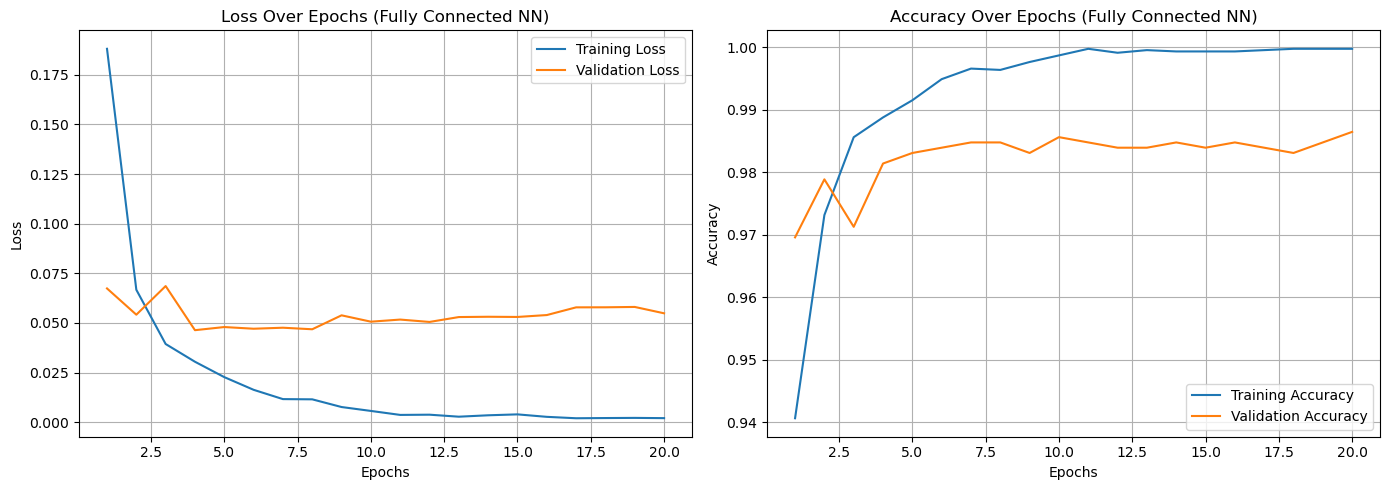

In [10]:
# Получение истории обучения
history_dict = history_resnet.history  # Доступ к атрибуту history
losses = history_dict['loss']
val_losses = history_dict['val_loss']
accuracies = history_dict['accuracy']
val_accuracies = history_dict['val_accuracy']

# Построение графиков
epochs = range(1, len(losses) + 1)

# График потерь
plt.figure(figsize=(14, 5))

# Подграфик 1: Потеря
plt.subplot(1, 2, 1)
plt.plot(epochs, losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title('Loss Over Epochs (Fully Connected NN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Подграфик 2: Точность
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Over Epochs (Fully Connected NN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()  # Чтобы избежать наложения графиков
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step


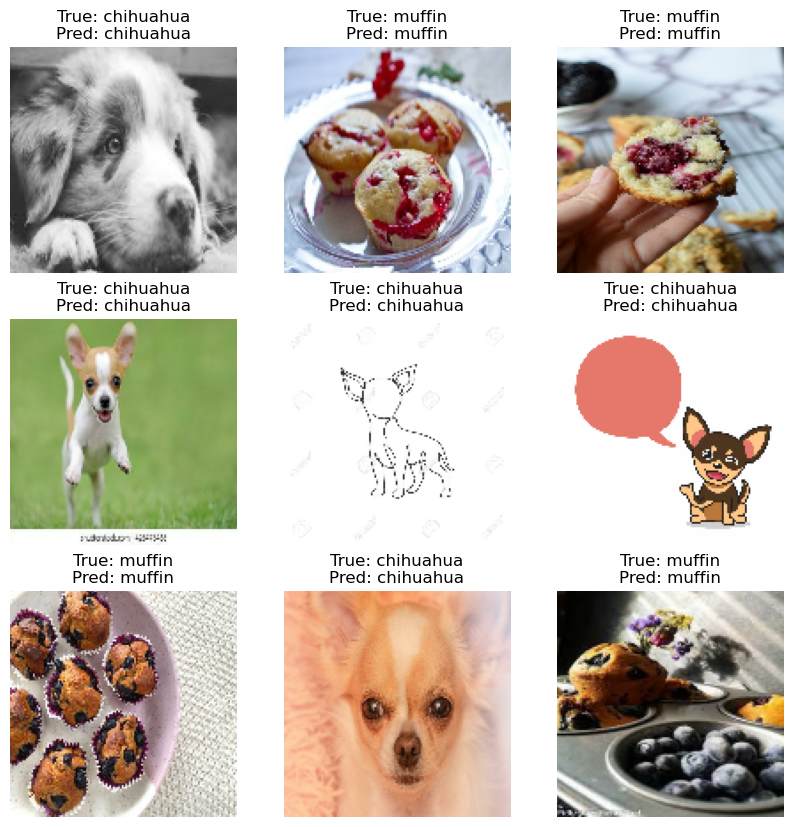

In [12]:
# Получаем первую партию изображений и их метки из тестового набора данных
image_batch, label_batch = next(iter(test_ds))

# Получаем предсказания модели
predictions = model_resnet.predict(image_batch)
predicted_labels = (predictions > 0.5).astype("int32")  # Превращаем вероятности в метки (0 или 1)

# Для отображения
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    
    # Преобразование изображения в формат uint8
    plt.imshow((image_batch[i].numpy()).astype('uint8'))

    true_label = class_names[label_batch[i].numpy()]  # Истинная метка
    pred_label = class_names[predicted_labels[i][0]]   # Предсказанная метка

    # Используем заголовок для отображения "True" и "Pred"
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')

plt.show()  # Показываем изображения
